## 1. Intro about dataset

### 1.1. Short source discription

This dataset contains sales data for an Italian restaurant, providing detailed insights into menu performance, revenue trends, and customer preferences over the course of a year (2024). It includes key variables such as menu items, categories (appetizers, main courses, desserts), quantities sold, prices, revenue, payment methods (Credit Card, Cash, Mobile Payment), and customer types (Dine-In, Takeaway, Delivery). The dataset is designed to reflect realistic restaurant operations and allows for the analysis of seasonal trends, peak sales periods, and customer behaviors. It is ideal for data analysis, visualization, and predictive modeling projects in the context of the foodservice industry.

Source link: https://www.kaggle.com/datasets/divyanshisen/italian-bistro-sales-data-a-year-in-numbers

### 1.2. Primary review

In [1]:
import numpy as np
import pandas as pd
import datetime
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Import dataset and preview
data_path = '../Final_Project/large_italian_restaurant_sales.xlsx'
df = pd.read_excel(data_path)
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [4]:
# Total dataset parameters
total_rows, total_columns = df.shape[0], df.shape[1]
total_mb = df.memory_usage().sum() / (1024 * 1024)
print(f'Total rows number: {total_rows}, columns number: {total_columns}')
print(f'Total memory usage: {total_mb:.2f} Mb')

Total rows number: 10000, columns number: 9
Total memory usage: 0.69 Mb


In [5]:
# Total dataset columns and types review
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              10000 non-null  object 
 1   Time              10000 non-null  object 
 2   Menu Item         10000 non-null  object 
 3   Category          10000 non-null  object 
 4   Quantity          10000 non-null  int64  
 5   Price (per item)  10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Payment Method    10000 non-null  object 
 8   Customer Type     10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB


In [6]:
# Null values check
print(f'Total check of null values number in dataset. Result: {df.isnull().sum().sum()}')
print(f'Additional detailed check by columns:')
df.isnull().any()

Total check of null values number in dataset. Result: 0
Additional detailed check by columns:


Date                False
Time                False
Menu Item           False
Category            False
Quantity            False
Price (per item)    False
Revenue             False
Payment Method      False
Customer Type       False
dtype: bool

In [7]:
# Dublicate values check
print(f'Total check of dublicate values number in dataset. Result: {df.duplicated().any()}')

Total check of dublicate values number in dataset. Result: False


In [8]:
# Calculation for Revenue values check
calc_check = np.all(df['Quantity'] * df['Price (per item)'] == df['Revenue'])
print(f'Total check of calculation for Revenue values. Result: {calc_check}')

Total check of calculation for Revenue values. Result: True


In [9]:
# Numerical data review
with pd.option_context("display.precision", 2):
    display(df.describe())

,Quantity,Price (per item),Revenue
count,10000.00,10000.00,10000.00
mean,2.98,8.32,24.77
std,1.42,2.96,15.34
min,1.00,4.50,4.50
25%,2.00,5.50,13.00
50%,3.00,7.00,22.00
75%,4.00,11.50,34.50
max,5.00,13.00,65.00


In [10]:
# Object data review
column_names = df.select_dtypes('object').columns

print(f'List of unique values for object colums:')
for el in column_names[2:]:
    print(f'{el}: {list(df[el].unique())}')

List of unique values for object colums:
Menu Item: ['Margherita Pizza', 'Caprese Salad', 'Tiramisu', 'Gelato', 'Spaghetti Carbonara', 'Fettuccine Alfredo', 'Panna Cotta', 'Minestrone Soup', 'Lasagna', 'Bruschetta']
Category: ['Main Course', 'Appetizer', 'Dessert']
Payment Method: ['Credit Card', 'Mobile Payment', 'Cash']
Customer Type: ['Dine-In', 'Takeaway', 'Delivery']


**Summary:**  
1. Input dataset contains 10k rows and 9 columns. Total file memory usage - 0.69 Mb.  
2. Dataset includes 3 numerical and 6 object type values, including 2 datetime columns Date and Time.  
Recommendation - transform  Date and Time columns to correct datetime type for further analysis.   
3. Input dataset is whole, clean and correctly formed. Checks of null values, dublicates and correct calculations were successfully completed.  
4. Numerical data review shows normal values split without questionable deviations.  
5. Object data review confirms correct and appropriate data filling.  

### 1.3. Dataset update

In [11]:
# Transform Data and Time to correct datetime type
df.Date = pd.to_datetime(df.Date)
df.Time = pd.to_datetime(df.Time, format='%I:%M %p').dt.time
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [12]:
# Add new datetime columns on base of Date and Time for further analysis and aggregations
df['year'] = df.Date.apply(lambda x: x.year)
df['month'] = df.Date.apply(lambda x: x.month)
df['day'] = df.Date.apply(lambda x: x.day)
df['date_upd'] = df.Date.dt.strftime('%Y%m%d').astype(str)
df['month_upd'] = df.Date.dt.strftime('%Y%m').astype(str)
df['day_of_week'] = df.Date.apply(lambda x: x.isoweekday())
df['hour'] = df.Time.apply(lambda x: x.hour)
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type,year,month,day,date_upd,month_upd,day_of_week,hour
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,2024,11,23,20241123,202411,6,3
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,2024,3,12,20240312,202403,2,3
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,2024,1,17,20240117,202401,3,1
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,2024,11,4,20241104,202411,1,0
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,2024,12,25,20241225,202412,3,18


In [13]:
# Additional result check of correct date and time filling - range check
print('Year range check: ', df.year.unique())
print('Month range check: ', sorted(df.month.unique().tolist()))
print('Day range check: ', sorted(df.day.unique().tolist()))
print('Day of week range check: ', sorted(df.day_of_week.unique().tolist()))
print('Hour range check: ', sorted(df.hour.unique().tolist()))

Year range check:  [2024]
Month range check:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Day range check:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Day of week range check:  [1, 2, 3, 4, 5, 6, 7]
Hour range check:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [14]:
# Delete not needed column with year as we have due to check only 2024
df = df.drop(columns=['year'])
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type,month,day,date_upd,month_upd,day_of_week,hour
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11,23,20241123,202411,6,3
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3,12,20240312,202403,2,3
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1,17,20240117,202401,3,1
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,11,4,20241104,202411,1,0
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,12,25,20241225,202412,3,18


In [15]:
# Add new column for eating time split
def hour_type(hour):
    '''Split day time by eating type'''
    if 6 <= hour <= 11:
        return '1-Breakfast'
    elif 12 <= hour <= 17:
        return '2-Lunch'
    elif 18 <= hour <= 23:
        return '3-Dinner'
    else:
        return '4-Night'

df['hour_type'] = df.hour.apply(hour_type)
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type,month,day,date_upd,month_upd,day_of_week,hour,hour_type
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11,23,20241123,202411,6,3,4-Night
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3,12,20240312,202403,2,3,4-Night
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1,17,20240117,202401,3,1,4-Night
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,11,4,20241104,202411,1,0,4-Night
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,12,25,20241225,202412,3,18,3-Dinner


In [16]:
# Add new column for season define
def season_type(month):
    '''Split months by season type'''
    if 3 <= month <= 5:
        return '1-Spring'
    elif 6 <= month <= 8:
        return '2-Summer'
    elif 9 <= month <= 11:
        return '3-Autumn'
    else:
        return '4-Winter'

df['season_type'] = df.month.apply(season_type)
df.head(5)

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type,month,day,date_upd,month_upd,day_of_week,hour,hour_type,season_type
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11,23,20241123,202411,6,3,4-Night,3-Autumn
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3,12,20240312,202403,2,3,4-Night,1-Spring
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1,17,20240117,202401,3,1,4-Night,4-Winter
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,11,4,20241104,202411,1,0,4-Night,3-Autumn
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,12,25,20241225,202412,3,18,3-Dinner,4-Winter


In [17]:
# Rename input columns due to standard naming rules
df.rename(columns={'Date': 'date', 
                   'Time': 'time', 
                   'Menu Item': 'menu_item', 
                   'Category': 'category', 
                   'Quantity': 'quantity', 
                   'Price (per item)': 'price', 
                   'Category': 'category', 
                   'Revenue': 'revenue', 
                   'Payment Method': 'pay_method', 
                   'Customer Type': 'customer_type'}, inplace=True)
df.head(5)

,date,time,menu_item,category,quantity,price,revenue,pay_method,customer_type,month,day,date_upd,month_upd,day_of_week,hour,hour_type,season_type
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11,23,20241123,202411,6,3,4-Night,3-Autumn
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3,12,20240312,202403,2,3,4-Night,1-Spring
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1,17,20240117,202401,3,1,4-Night,4-Winter
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,11,4,20241104,202411,1,0,4-Night,3-Autumn
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,12,25,20241225,202412,3,18,3-Dinner,4-Winter


In [18]:
# Save final input copy for further analysis
df_upd = df.copy()
df_upd.head(5)

,date,time,menu_item,category,quantity,price,revenue,pay_method,customer_type,month,day,date_upd,month_upd,day_of_week,hour,hour_type,season_type
0,2024-11-23,03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In,11,23,20241123,202411,6,3,4-Night,3-Autumn
1,2024-03-12,03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway,3,12,20240312,202403,2,3,4-Night,1-Spring
2,2024-01-17,01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery,1,17,20240117,202401,3,1,4-Night,4-Winter
3,2024-11-04,00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery,11,4,20241104,202411,1,0,4-Night,3-Autumn
4,2024-12-25,18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery,12,25,20241225,202412,3,18,3-Dinner,4-Winter


In [19]:
# Save update file for next analysis in Tableau
df_upd.to_csv('large_italian_restaurant_sales.csv', index=False)

**Summary:**  
1. Work with datetime columns - update type for existing columns `date` and `time`, add new values for further analysis like `month`, `day`, `date_upd`,`day_of_week`, `hour`, `hour_type` and `season_type`.  
2. Update source column names due to one standard and easy to work approach.   
3. Save final dataset copy for further analysis.

## 2. Data Q&A analysis

### 2.1. What are total key results for Bistro in 2024?

In [20]:
total_orders = df_upd.date.count()
total_dishes = df_upd.quantity.sum()
total_revenue = df_upd.revenue.sum()

data_indexes = [
    ['Orders', total_orders],
    ['Dishes', total_dishes],
    ['Revenue', total_revenue],
    ['Average revenue per 1 order', round(total_revenue / total_orders)],
    ['Average dishes number per 1 order', round(total_dishes / total_orders)]
]

headers = ['Index name', 'Value']

print(f'Total Bistro results from {min(df.date.dt.date)} to {max(df.date.dt.date)}:')
print(tabulate(data_indexes, headers=headers, tablefmt='grid', numalign='right', stralign='left'))

Total Bistro results from 2024-01-01 to 2024-12-30:
+-----------------------------------+---------+
| Index name                        |   Value |
+===================================+=========+
| Orders                            |   10000 |
+-----------------------------------+---------+
| Dishes                            |   29780 |
+-----------------------------------+---------+
| Revenue                           |  247730 |
+-----------------------------------+---------+
| Average revenue per 1 order       |      25 |
+-----------------------------------+---------+
| Average dishes number per 1 order |       3 |
+-----------------------------------+---------+


### 2.2. What is the general trend in sales quantity and revenue by dish category?

In [21]:
df_by_category = df_upd.groupby('category')[['quantity','revenue']].sum().sort_values(by='revenue', ascending=False)
df_by_category

,quantity,revenue
category,,
Main Course,11985,139581.5
Appetizer,8633,57608.0
Dessert,9162,50541.0


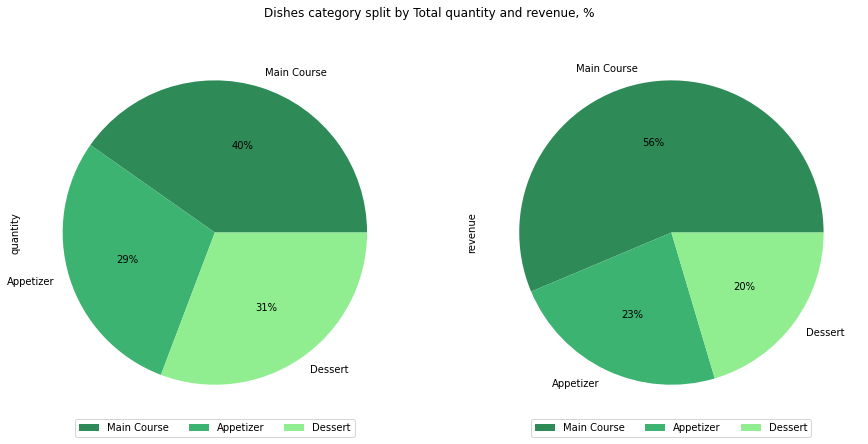

In [22]:
colors = ['SeaGreen', 'MediumSeaGreen', 'LightGreen']
axes = df_by_category.plot.pie(subplots=True, figsize=(15, 7), autopct='%1.0f%%', colors=colors)
plt.suptitle('Dishes category split by Total quantity and revenue, %', x=0.5, y=0.95)

for ax in axes:
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.show();

**Summary:**  
1. Main course is the most profitable and popular dishes category in Bistro - 56% of Total revenue and 40% of Total quantity in 2024. The rest of income is almost equally divided between Appetizer (23%) and Dessert (20%).
2. Although Appetizer took slightly larger share of Total revenue than Dessert (mostly due to larger prices level), share by Total quantity showed that Dessert is sold more (31%) than Appetizer (29%).

### 2.3. What are the main consumer trends at menu level? What dishes are the most profitable and popular in Bistro?

In [23]:
df_by_menu1 = df_upd.groupby('menu_item')[['quantity']].sum().sort_values(by='quantity', ascending=True)
df_by_menu2 = df_upd.groupby('menu_item')[['revenue']].sum().sort_values(by='revenue', ascending=True)

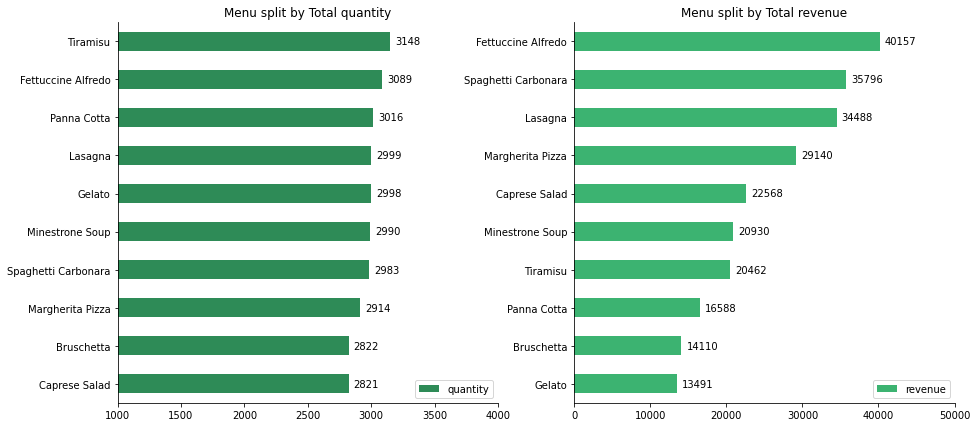

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Barplot 1
df_by_menu1.plot.barh(ax=axes[0], color='SeaGreen')
axes[0].set_title('Menu split by Total quantity')
axes[0].set_xlim(1000, 4000)  
axes[0].set_ylabel('') 
axes[0].legend(loc='lower right')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=5)

# Barplot 2
df_by_menu2.plot.barh(ax=axes[1], color='MediumSeaGreen')
axes[1].set_title('Menu split by Total revenue')
axes[1].set_xlim(0, 50000) 
axes[1].set_ylabel('') 
axes[1].legend(loc='lower right')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=5)

plt.show();

**Summary:**  
1. In TOP5 of the most popular Bistro dishes are 3 Desserts (Tiramisu, Panna Cotta & Gelato) and 2 Main courses (Pasta Fettuccine Alfredo and Lasagna). Interesting to note:  
 - Tiramisu is the most favorite menu item.  
 - Fettuccine Alfredo takes the 1st place among main dishes.  
 - Caprese Salad is least popular Bistro item. Reccomendation to research this issue and maybe review its recipe due to consumer feedbacks.  
2. In terms of Total revenue TOP5 of the most profitable dishes include 4 Main courses (Fettuccine Alfredo, Spaghetti Carbonara, Lasagna and Margherita Pizza) and 1 Appetizer - Caprese Salad. One more point to review demand on last one. Instead of this Desserts takes last places in revenue split mainly as cheapest items in Bistro menu.  
3. Fettuccine Alfredo is the core product in Bistro menu due to revenue and quantity split.

### 2.4. Are there any specifics of dishes preferences by customer type?

In [25]:
# quantity part of pivot table
pivot_table = pd.pivot_table(
    df_upd,
    values='quantity',  
    index=['category','menu_item'],
    columns='customer_type', 
    aggfunc=pd.Series.sum,  
)
pivot_table.loc['Total'] = pivot_table.sum(numeric_only=True).values

# share part of pivot table
perc_pivot = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100
perc_pivot.loc['Total'] = perc_pivot.sum(numeric_only=True).values

# concat total pivot table
percentages = perc_pivot.round(1).astype(float).astype(str) + '%'
final_pivot = pd.concat([pivot_table, percentages], keys=['Quantity', 'Share %'], axis=1)
final_pivot

Quantity                   Share %          \
customer_type                      Delivery Dine-In Takeaway Delivery Dine-In   
(Appetizer, Bruschetta)                 968     970      884     4.9%    4.8%   
(Appetizer, Caprese Salad)              963     950      908     4.9%    4.7%   
(Appetizer, Minestrone Soup)            927    1060     1003     4.7%    5.3%   
(Dessert, Gelato)                      1007     977     1014     5.1%    4.9%   
(Dessert, Panna Cotta)                  998     981     1037     5.1%    4.9%   
(Dessert, Tiramisu)                    1084    1008     1056     5.5%    5.0%   
(Main Course, Fettuccine Alfredo)      1074     995     1020     5.5%    5.0%   
(Main Course, Lasagna)                  967     991     1041     4.9%    5.0%   
(Main Course, Margherita Pizza)         935    1024      955     4.8%    5.1%   
(Main Course, Spaghetti Carbonara)      917    1054     1012     4.7%    5.3%   
Total                                  9840   10010     9930   100.0%  100.0%   

                                             
customer_type                      Takeaway  
(Appetizer, Bruschetta)                4.5%  
(Appetizer, Caprese Salad)             4.6%  
(Appetizer, Minestrone Soup)           5.1%  
(Dessert, Gelato)                      5.1%  
(Dessert, Panna Cotta)                 5.2%  
(Dessert, Tiramisu)                    5.3%  
(Main Course, Fettuccine Alfredo)      5.1%  
(Main Course, Lasagna)                 5.2%  
(Main Course, Margherita Pizza)        4.8%  
(Main Course, Spaghetti Carbonara)     5.1%  
Total                                100.0%

**Summary:**  
1. The most popular in Bistro is Dine-In customer type - 10 010 dishes were served inside cafe. Takeaway is on 2-nd place (9 930 dishes).  
2. Dine-In clients mostly choose Minestrone Soup (5,3%), Spaghetti Carbonara (5,3%) and Pizza (5,1%). This may be caused of need to eat a hot dish right in place or convenience to chat & eat pizza with a group of people.  
3. Among Takeaway customers most popular are Tiramisu (5,3%), Panna Cota (5,2%) and Lasagna (5,2%). I think people more prefer take with them desserts and easy to pack&go dishes like Lasagna.  
4. For Delivery mostly take Fettuccine Alfredo (5,5%) and Tiramisu (5,5%). So they are the most popular dishes to eat at own places (like home, work). 

### 2.5. How different customer types usually pay?

In [26]:
# quantity part of pivot table
pivot_table = pd.pivot_table(
    df_upd,
    values='quantity',  
    index='pay_method',
    columns='customer_type', 
    aggfunc=pd.Series.count,  
)
pivot_table.loc['Total'] = pivot_table.sum(numeric_only=True).values

# share part of pivot table
perc_pivot = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100
perc_pivot.loc['Total'] = perc_pivot.sum(numeric_only=True).values

# concat total pivot table
percentages = perc_pivot.round(1).astype(float).astype(str) + '%'
final_pivot = pd.concat([pivot_table, percentages], keys=['Orders', 'Share %'], axis=1)
final_pivot

Orders                   Share %                 
customer_type  Delivery Dine-In Takeaway Delivery Dine-In Takeaway
pay_method                                                        
Cash               1115    1132     1127    17.0%   16.9%    16.7%
Credit Card        1052    1085     1150    16.0%   16.2%    17.1%
Mobile Payment     1111    1136     1092    16.9%   16.9%    16.2%
Total              3278    3353     3369   100.0%  100.0%   100.0%

**Summary:**  
1. Dine-In and Delivery customers usually pay by Cash (16,9%-17%) and Mobile Payment (16,9%).  
2. Instead of this Takeaway orders mostly paid by Credit Card (17,1%). It can be explained as more impulsive or unplanned purchases.

### 2.6. Is it possible to classify a bistro menu items by quantity in one order?

In [27]:
# quantity part of pivot table
pivot_table = pd.pivot_table(
    df_upd,
    values='date',
    index=['category','menu_item'],
    columns='quantity',
    aggfunc=pd.Series.count
)
pivot_table['Total'] = pivot_table.sum(axis=1, numeric_only=True)

# share part of pivot table
perc_pivot = pivot_table.div(pivot_table['Total'], axis=0) * 100
percentages = perc_pivot.round(1).astype(float).astype(str) + '%'

# concat total pivot table
final_pivot = pd.concat([pivot_table, percentages], keys=['Orders', 'Share %'], axis=1)
final_pivot

Orders                           Share %  \
quantity                             1    2    3    4    5 Total       1   
category    menu_item                                                      
Appetizer   Bruschetta             201  212  171  186  188   958   21.0%   
            Caprese Salad          192  183  202  183  185   945   20.3%   
            Minestrone Soup        198  202  201  205  193   999   19.8%   
Dessert     Gelato                 187  198  190  215  197   987   18.9%   
            Panna Cotta            223  207  191  209  194  1024   21.8%   
            Tiramisu               221  195  220  203  213  1052   21.0%   
Main Course Fettuccine Alfredo     226  204  178  219  209  1036   21.8%   
            Lasagna                211  219  177  206  199  1012   20.8%   
            Margherita Pizza       188  207  207  189  187   978   19.2%   
            Spaghetti Carbonara    219  201  197  189  203  1009   21.7%   

                                                                     
quantity                             2      3      4      5   Total  
category    menu_item                                                
Appetizer   Bruschetta           22.1%  17.8%  19.4%  19.6%  100.0%  
            Caprese Salad        19.4%  21.4%  19.4%  19.6%  100.0%  
            Minestrone Soup      20.2%  20.1%  20.5%  19.3%  100.0%  
Dessert     Gelato               20.1%  19.3%  21.8%  20.0%  100.0%  
            Panna Cotta          20.2%  18.7%  20.4%  18.9%  100.0%  
            Tiramisu             18.5%  20.9%  19.3%  20.2%  100.0%  
Main Course Fettuccine Alfredo   19.7%  17.2%  21.1%  20.2%  100.0%  
            Lasagna              21.6%  17.5%  20.4%  19.7%  100.0%  
            Margherita Pizza     21.2%  21.2%  19.3%  19.1%  100.0%  
            Spaghetti Carbonara  19.9%  19.5%  18.7%  20.1%  100.0%

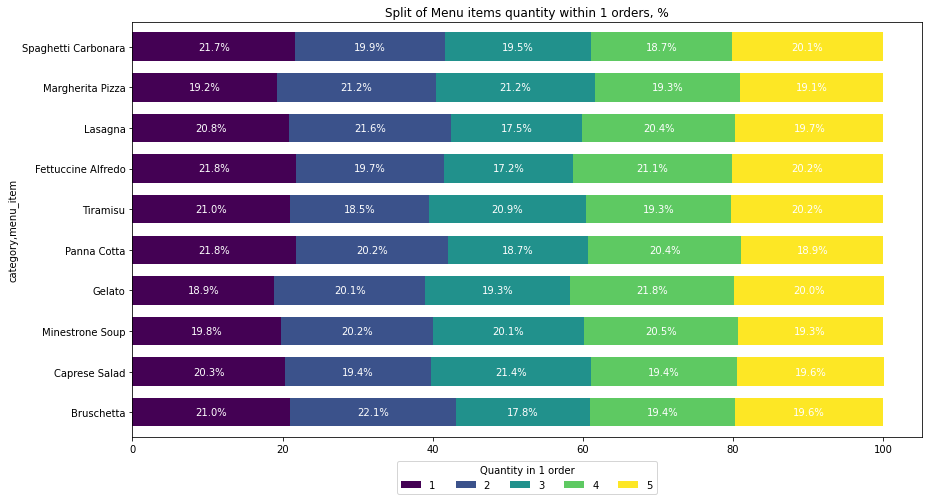

In [28]:
share_percentages = final_pivot["Share %"].drop(columns=["Total"]).apply(lambda x: x.str.rstrip('%').astype(float))
menu_items = final_pivot.index.get_level_values('menu_item')

fig, ax = plt.subplots(figsize=(13, 7))
bars = share_percentages.plot(kind="barh", stacked=True, ax=ax, colormap='viridis', width=0.7)

for i, (index, row) in enumerate(share_percentages.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(cumulative + value / 2, i, f"{value:.1f}%", ha="center", va="center", fontsize=10, color="white")
        cumulative += value

ax.set_yticks(range(len(menu_items)))
ax.set_yticklabels(menu_items)
ax.set_xlabel('')
ax.set_title('Split of Menu items quantity within 1 orders, %')
ax.legend(title='Quantity in 1 order', bbox_to_anchor=(0.5, -0.15), loc="lower center", ncol=5)
plt.tight_layout()
plt.show();

**Summary:**  
1. As our dataset contains limited number of menu items in one order (from 1 to 5 units), were considered all options separately instead of defining clusters for analysis.  
2. Due to resuls Fettuccine Alfredo (21,8%), Spaghetti Carbonara (21,7%), Panna Cotta (21,8%) and Tiramisu (21%) are mostly considered for single order for one person.  
3. Lasagna (21,6%) and Bruschetta (22,1%) can be ordered mostly for couple (2 units in 1 order).  
4. Margherita Pizza mostly served as 2-3 units in 1 order (42,4%).  
5. Minestrone Soup (20,5%) and Gelato (21,8%) and Caprese Salad more often ordered like 3-4 units in 1 order. So can be considered as popular dishes for group orders.  

### 2.7. Let's analyze time dynamics for dishes orders now. Are there any seasonal patterns?

In [29]:
season_ptable = pd.pivot_table(
    df_upd,
    values='quantity',  
    index='season_type',
    columns='category', 
    aggfunc=pd.Series.sum,  
)

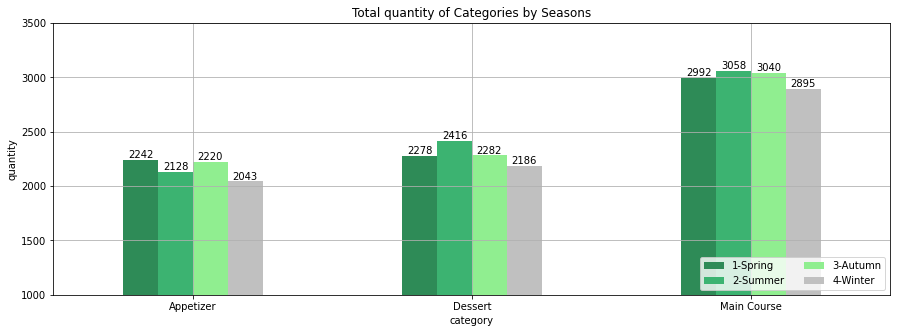

In [30]:
colors = ['SeaGreen', 'MediumSeaGreen', 'LightGreen', 'Silver']
ax = season_ptable.T.plot.bar(figsize=(15,5),color=colors)
ax.set_ylim(1000, 3500) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.d')
    
plt.title('Total quantity of Categories by Seasons')
plt.xlabel('category')
plt.ylabel('quantity')
plt.legend(loc='lower right', ncol=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.grid(True);

**Summary:**  
1. Barplot shows that Appetizers are more popular in spring and autumn. As they are usually a group order dishes, it turns out that groups prefer to visit Bistro in spring and autumn (maybe because they can more walking in summer and stay home in winter).  
2. Desserts, as expected, are most popular in summer (cold dishes).  
3. The highest number of Main Course orders are in summer and autumn (I think people go out more and this is also tourist season).

### 2.8. Are there any features in quantity dynamics by months?

In [31]:
pivot_table1 = pd.pivot_table(
    df_upd[df.category == 'Appetizer'],
    values='quantity',  
    index='month',
    columns='menu_item', 
    aggfunc=pd.Series.sum,  
)

pivot_table2 = pd.pivot_table(
    df_upd[df.category == 'Dessert'],
    values='quantity',  
    index='month',
    columns='menu_item', 
    aggfunc=pd.Series.sum,  
)

pivot_table3 = pd.pivot_table(
    df_upd[df.category == 'Main Course'],
    values='quantity',  
    index='month',
    columns='menu_item', 
    aggfunc=pd.Series.sum,  
)

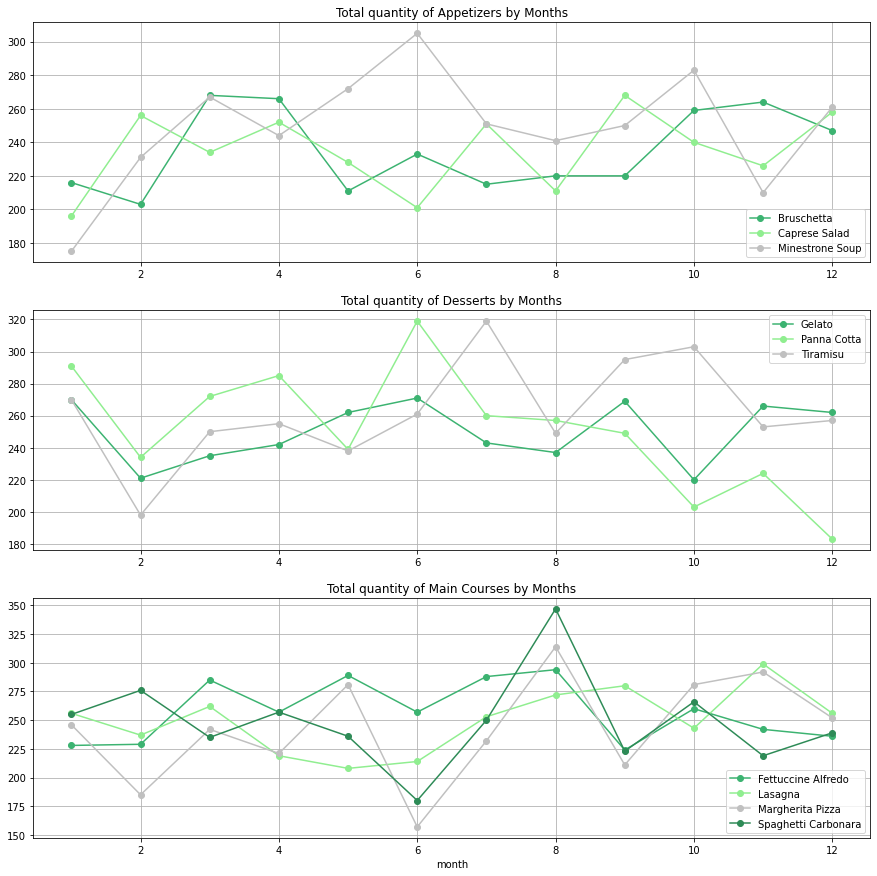

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
colors = ['MediumSeaGreen', 'LightGreen', 'Silver', 'SeaGreen']

pivot_table1.plot(ax=axes[0], color=colors, marker='o')
axes[0].set_title('Total quantity of Appetizers by Months')
axes[0].set_xlabel('') 
axes[0].legend(loc='lower right')
axes[0].grid(True)

pivot_table2.plot(ax=axes[1], color=colors, marker='o')
axes[1].set_title('Total quantity of Desserts by Months')
axes[1].set_xlabel('') 
axes[1].legend(loc='upper right')
axes[1].grid(True)

pivot_table3.plot(ax=axes[2], color=colors, marker='o')
axes[2].set_title('Total quantity of Main Courses by Months')
axes[2].legend(loc='lower right')
axes[2].grid(True)

plt.show;

**Summary:**  
1. Best months for Appetizers sales are March-April (Spring) and September-October (Autumn). In June 2024 was unusually high sale of Minestrone Soup. For understanding its nature will be nice to get more info - is it a casual event or it can be used as a good practice to increase the overall level of Appetizers sales.  
2. Generally Desserts are better selling in June-July (Summer) and December-January (Winter, maybe due to Charistmas holidays time). Tiramisu also had a good demand in September-October.  
3. Main Courses showed smaller total seasonal / monthly variations in relation to other Categories with one exception. In diagram was found unusual small sale in June and high sale in August for two items - Margherita Pizza and Spaghetti Carbonara. It was decided to check this period below on the daily dynamics for these two dishes.  

In [33]:
df_check = df_upd.query(" (menu_item == 'Margherita Pizza' | menu_item == 'Spaghetti Carbonara') & '20240601' <= date_upd <= '20240831' ")

pivot_table1 = pd.pivot_table(
    df_check[df_check.menu_item == 'Margherita Pizza'],
    values='quantity',  
    index='date_upd',
    columns='menu_item', 
    aggfunc=pd.Series.sum,  
)

pivot_table2 = pd.pivot_table(
    df_check[df_check.menu_item == 'Spaghetti Carbonara'],
    values='quantity',  
    index='date_upd',
    columns='menu_item', 
    aggfunc=pd.Series.sum,  
)

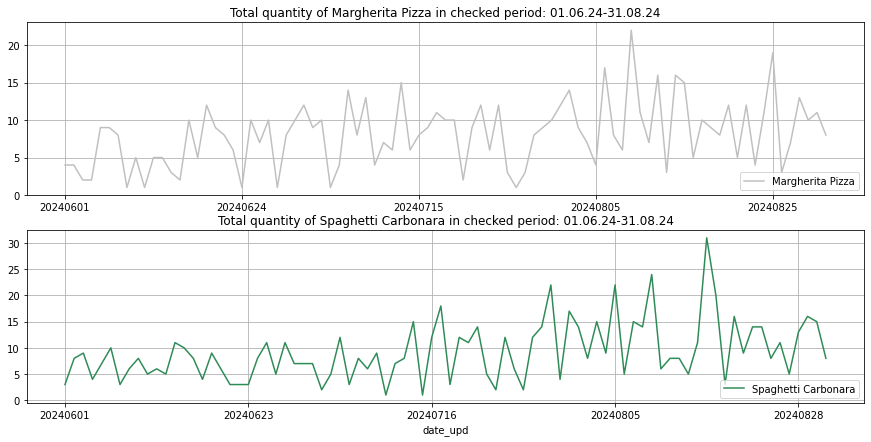

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

pivot_table1.plot(ax=axes[0], color='Silver')
axes[0].set_title('Total quantity of Margherita Pizza in checked period: 01.06.24-31.08.24')
axes[0].set_xlabel('') 
axes[0].legend(loc='lower right')
axes[0].grid(True)

pivot_table2.plot(ax=axes[1], color='SeaGreen')
axes[1].set_title('Total quantity of Spaghetti Carbonara in checked period: 01.06.24-31.08.24')
axes[1].legend(loc='lower right')
axes[1].grid(True)

plt.show;

**Summary:**  
1. Due to graphs in June 2024 sales of both items were consistently low - nearly up to 10 items per day.  
2. Instead of this in August 2024 we saw growth of sales spread - from 5 to 30 items per day. This caused the overall sales growth in this month for Margherita Pizza and Spaghetti Carbonara.

### 2.9. Is any difference between sales in weekdays and weekends?

In [35]:
week_ptable = pd.pivot_table(
    df_upd,
    values='quantity',  
    index='day_of_week',
    columns='category', 
    aggfunc=pd.Series.sum,  
)
week_ptable

category,Appetizer,Dessert,Main Course
day_of_week,,,
1,1270,1394,1589
2,1271,1371,1728
3,1193,1301,1781
4,1109,1311,1709
5,1203,1244,1715
6,1265,1296,1703
7,1322,1245,1760


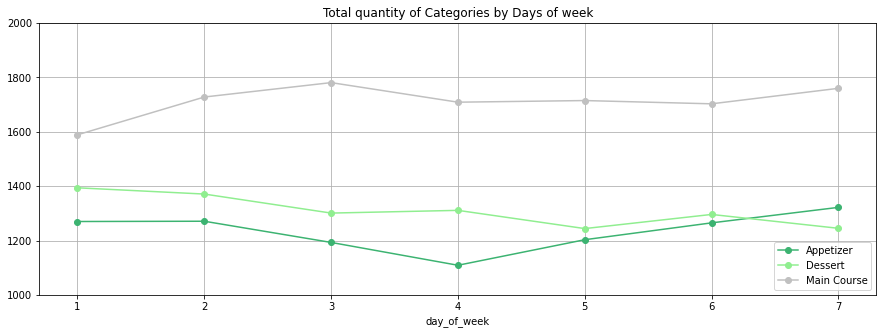

In [36]:
colors = ['MediumSeaGreen', 'LightGreen', 'Silver']

week_ptable.plot(figsize=(15, 5), color=colors, marker='o')
plt.title('Total quantity of Categories by Days of week')
plt.legend(loc='lower right')
plt.ylim(1000, 2000) 
plt.grid(True)
plt.show;

**Summary:**  
1. As for me Main Course shows relatively stable dynamics depending on the day of the week. Lightly better demand we have on Wednesday (middle of week) and Sunday (end of week) and a day, which can be used for some promotional offers - Monday.  
2. Desserts also have relatively stable sales, but instead of previous one, they better sale on Monday and Tuesday (start of week).  
3. Appetizers show gradual sales decline until Thursday and then symmetrical growth up to Sunday. Sunday and Monday are the best days for Appetizers sales. Thursday can be noted as a good choice for promotions on this Category.

### 2.10. Finally, let's check the demand specifics within day - by meal time.

In [37]:
hour_ptable = pd.pivot_table(
    df_upd,
    values='quantity',  
    index='hour_type',
    columns='category', 
    aggfunc=pd.Series.sum,  
)
hour_ptable

category,Appetizer,Dessert,Main Course
hour_type,,,
1-Breakfast,2288,2195,2887
2-Lunch,2180,2197,3248
3-Dinner,2102,2536,2976
4-Night,2063,2234,2874


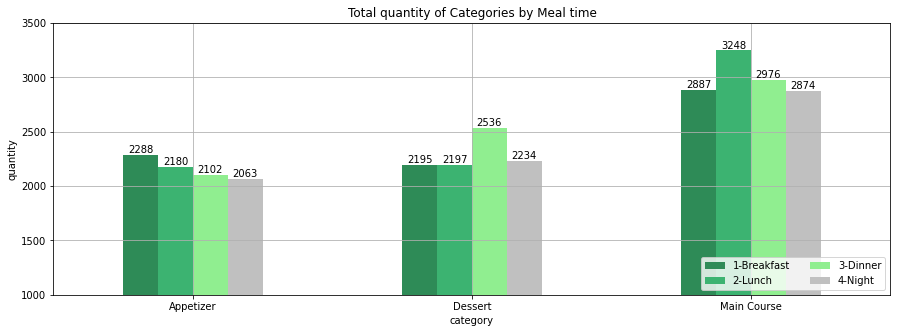

In [38]:
colors = ['SeaGreen', 'MediumSeaGreen', 'LightGreen', 'Silver']
ax = hour_ptable.T.plot.bar(figsize=(15,5),color=colors)
ax.set_ylim(1000, 3500) 

for container in ax.containers:
    ax.bar_label(container, fmt='%.d')
    
plt.title('Total quantity of Categories by Meal time')
plt.xlabel('category')
plt.ylabel('quantity')
plt.legend(loc='lower right', ncol=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.grid(True);

**Summary:**  
1. Due to diagram Appetizers are more ordered for breakfast. The later hour is, the less demand on them.  
2. Desserts have similar demand on all meal times except Dinner. Dinner is the best time for Desserts.  
3. Main Course has a similar distribution approach to the previous one, but its peak time is Lunch.  
4. Generally all above dependencies were expected and fully consistent with the general principles of human nutrition.

### 3. Final business recommendations and conclusions

Here are key business recommendations based on the analysis:

1. **Increase order value per customer:**  
 - Since the average revenue per 1 order is 25 and the average order contains 3 dishes, introduce “Meal Bundles” (e.g., Main Course + Dessert + Drink) to encourage customers to add more items.


2. **Expand Focus on Main Course:**
 - As Main Course generate 56% of total revenue, highlight them in marketing promos and offer additional discounted side dishes to complement pasta or pizza orders.
 - Since Fettuccine Alfredo is the most profitable and popular Main Course, create special promotions with it (e.g., combo meals, discounts on second portions or pairing it with drinks).

3. **Adjust Pricing Strategy for Desserts:**
 - Desserts are high in quantity (31% total share) but low in revenue (20% total share). A slight price increase (after checking the competitive price analysis) or introduction of premium dessert variations (e.g., “Special Tiramisu” with extra toppings) could boost profits.

4. **Investigate & Improve Caprese Salad:**
 - As Caprese Salad is unpopular despite being a top revenue generator, gather customer feedbacks to improve its recipe, presentation or pricing.

5. **Improve Takeaway & Delivery Strategies:**
 - Promote Lasagna, Fettuccine Alfredo and Tiramisu more for delivery, as they are the most commonly ordered items (e.g. introduce exclusive delivery-only meal combos with these items to encourage repeat purchases).
 - Offer combo deals for single-person orders, as Fettuccine Alfredo, Carbonara and Tiramisu are often ordered solo.
 - Since Takeaway and Delivery orders are strong, introduce loyalty programs (e.g., discounts for repeat customers or free delivery promotions on specific days to increase order frequency).
 - With high demand for Tiramisu, Panna Cotta, and Lasagna in Takeaway & Delivery, invest in premium, eco-friendly packaging to improve food presentation and customer satisfaction.

6. **Enhance Dine-In Experience for Group Orders:**
 - Since Dine-In customers prefer hot dishes (Minestrone, Pizza, Carbonara), offer “Dine-In Exclusive Combos” or group promotions like “Pizza Night Specials” that encourage group orders. 

7. **Strengthen Payment Convenience & Incentives:**
 - Promote cashless payments for Dine-In and Delivery (since Mobile Payment is 16.9%) by offering small discounts or loyalty points for digital transactions.
 - Since Takeaway customers prefer credit cards, optimize payment options with fast and contactless payments. Introduce prepaid meal cards or digital wallet promotions for dine-in and delivery customers.

8. **Leverage Seasonal and Weekly Trends:**
 - Promote Desserts aggressively in summer and winter when demand is naturally high (e.g., “Summer Coolers” or “Winter Holiday Specials”).
 - Boost Appetizer sales in spring and autumn with special group deals.
 - Encourage weekday traffic with happy hour promotions on lower-demand days like Tuesday or Thursday.
 - Push Appetizers and Main Courses promotion due to demand peaks.
 - Thursday: Promote Appetizers with “Buy One, Get Two” deals to counter the weekday sales drop.

9. **Create Targeted Meal-Time Offers:**
 - Offer breakfast combos featuring Appetizers (e.g., “Morning Bruschetta & Coffee”).
 - Boost Dessert sales at dinner by introducing after-meal dessert discounts.
 - Highlight Main Course specials at lunch to capture peak demand.

10. **Enhance Group Order Incentives:**
 - Since Minestrone Soup, Gelato, and Caprese Salad are often ordered in larger quantities, offer family-size portions or group discounts.
 - Promote Margherita Pizza for group sharing, as it is often ordered in 2-3 units per order.
 
11. **Research Unusual Demand Spikes:**
 - Investigate Minestrone Soup surge in June to determine if a seasonal or event-driven factor can be replicated.
 - Examine the low June and high August sales of Margherita Pizza & Spaghetti Carbonara to refine seasonal strategies.

12. **Enhance Digital and In-Store Promotions:**
 - Use social media to promote seasonal favorites (e.g., Summer Tiramisu, Winter Pasta Specials).
 - Offer “Appetizer Mornings” for breakfast rushes and “Dessert Nights” for dinner crowds.
 
13. **Train Staff for Strategic Upselling:**
 - Encourage servers to recommend desserts at dinner time.
 - Suggest appetizers for morning customers and promote group orders for larger tables.

Using these recommendations can help Bistro optimize sales across different seasons, meal times and customer behaviors to maximize its revenue and sales.

### 4. Tableau Sales Dashboard

Link: https://public.tableau.com/app/profile/olha.vorontsova/viz/Italian_bistro_sales_dashboard/Dashboard1